<a href="https://colab.research.google.com/github/Bobofidelis/Bobofidelis/blob/main/Cognitive_Frailty_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('CF.csv')
df

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
0,1,JANAGY A/P DORESAMY,71,Female,Indian,No formal education,1,0,0,1,...,1,1,1,1,1,1,10,14,CI/Dementia,Nan
1,2,SEENIVASAGAM A/L PONNUSAMY,76,Male,Indian,No formal education,1,1,Nan,1,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
2,3,PATRICIA PHILIP A/P J. PHILIP,83,Female,Others,Secondary,1,1,Nan,1,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,Female,Indian,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4,5,MURUGEMAH A/P SUBARAYAN,85,Female,Indian,NaN,Nan,Nan,Nan,Nan,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,6218,John anak Yabu,67,Male,Other Bumiputera,Primary,0,0,0,0,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
6071,6219,Pala anak Seman,81,Female,Other Bumiputera,No formal education,1,0,0,1,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
6072,6220,Ujoh anak Tawi,91,Male,Other Bumiputera,No formal education,0,0,0,0,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan
6073,6221,Enjong anak Nyawai,83,Female,Other Bumiputera,No formal education,1,0,0,1,...,0,0,0,0,0,0,0,0,CI/Dementia,Nan


In [3]:
#column_name= 'CF Label'
#item_counts= df[column_name].value_counts()
#print(item_counts)

In [4]:
# Remove rows where 'Cognitive label' is 'CI/Dementia'
df_cleaned = df[df['Cognitive label'] != 'CI/Dementia']

# Display the DataFrame after removing incomplete rows
print("\nDataFrame after removing CI/Dementia rows:")
print(df_cleaned)


DataFrame after removing CI/Dementia rows:
      Study ID (Ageless)                       Full Name Age  Gender  \
3                      4  CHANDRIKA A/P GANGADHARAN MENN  63  Female   
6                      7  SIVAPAKIA NATHAN A/L KANDASAMY  76    Male   
7                      8      JEYAMALAR A/P S PARAMASAMY  70  Female   
11                    12                CHE YUN BT OSMAN  76    Male   
16                    17                    KOK KIM CHOO  67  Female   
...                  ...                             ...  ..     ...   
4718                4835                 Mazlan Bin Amat  68    Male   
4725                4842                  CHOO MUN KEONG  76    Male   
4726                4844             Som binti Abu Bakar  70  Female   
4774                4896          MUTHAMAH A/P SAMIKKANU  73  Female   
5069                5206                  Loong Ping Sum  70    Male   

     Ethnicity                     Highest educational level Fatigue  \
3       Indian  Uni

In [5]:
df=df_cleaned

In [6]:
df

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,Female,Indian,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,Male,Indian,University (include degree course) and above,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,Female,Indian,University (include degree course) and above,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,Male,Malay,Primary,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,Female,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,4835,Mazlan Bin Amat,68,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only
4725,4842,CHOO MUN KEONG,76,Male,Chinese,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only
4726,4844,Som binti Abu Bakar,70,Female,Malay,Primary,Nan,Nan,Nan,Nan,...,1,1,1,1,1,1,19,26,SCD,EMCI Only
4774,4896,MUTHAMAH A/P SAMIKKANU,73,Female,Indian,NaN,Nan,Nan,Nan,Nan,...,1,1,1,1,1,1,19,26,SCD,EMCI Only


In [7]:
df.head(10)

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,Female,Indian,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,Male,Indian,University (include degree course) and above,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,Female,Indian,University (include degree course) and above,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,Male,Malay,Primary,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,Female,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
18,19,ZUBIR BIN NORDIN,81,Male,Malay,Primary,1,0,0,0,...,1,1,1,1,1,1,15,20,MCI,Pre-Frail + LMCI
19,20,SAVITHIRI THEVI A/P P. V. SOCKALINGAM,77,Female,Indian,Secondary,0,0,0,0,...,1,1,1,1,1,1,16,22,MCI,Pre-Frail + LMCI
21,22,CECILIA CHIN CHOON LAN,79,Female,Chinese,Secondary,1,0,0,0,...,1,1,1,1,1,1,19,26,SCD,Pre-Frail + EMCI
22,23,SANTHAMA RAJAN A/P M.C.JACOB,79,Female,Indian,Secondary,1,0,0,0,...,1,1,1,1,1,1,21,29,NC,Pre-Frail only
28,29,H'NG SEEK HING @ H'NG SOO LENG,71,Female,Chinese,University (include degree course) and above,1,0,0,0,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only


In [8]:
df.tail(10)

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
4629,4746,Cheah Hai Tah,82,Male,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4648,4765,SHAHARUMAN BIN SHAHADAN,72,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4670,4787,Thui Choong Heng,62,Male,Chinese,Certificate / Skill/ Diploma (Post-secondary),0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4674,4791,Linda Scott,61,Female,Others,No formal education,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4708,4825,Mat Derus bin Maaji,85,Male,Malay,Primary,1,1,1,1,...,1,1,1,1,1,1,16,22,MCI,Frail+LMCI
4718,4835,Mazlan Bin Amat,68,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only
4725,4842,CHOO MUN KEONG,76,Male,Chinese,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only
4726,4844,Som binti Abu Bakar,70,Female,Malay,Primary,Nan,Nan,Nan,Nan,...,1,1,1,1,1,1,19,26,SCD,EMCI Only
4774,4896,MUTHAMAH A/P SAMIKKANU,73,Female,Indian,NaN,Nan,Nan,Nan,Nan,...,1,1,1,1,1,1,19,26,SCD,EMCI Only
5069,5206,Loong Ping Sum,70,Male,Chinese,University (include degree course) and above,Nan,Nan,Nan,Nan,...,1,1,1,1,1,1,21,29,NC,Robust


In [9]:
column_name= 'Fatigue'
item_counts= df[column_name].value_counts()
print(item_counts)

0      616
1      230
Nan     77
Name: Fatigue, dtype: int64


In [10]:
column_name= 'Ambulation'
item_counts= df[column_name].value_counts()
print(item_counts)

0      728
1      119
Nan     76
Name: Ambulation, dtype: int64


In [11]:
column_name= 'Resistance'
item_counts= df[column_name].value_counts()
print(item_counts)

0      547
1      299
Nan     77
Name: Resistance, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 3 to 5069
Data columns (total 62 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Study ID (Ageless)                                                                  923 non-null    int64  
 1   Full Name                                                                           923 non-null    object 
 2   Age                                                                                 907 non-null    object 
 3   Gender                                                                              921 non-null    object 
 4   Ethnicity                                                                           901 non-null    object 
 5   Highest educational level                                                           886 non-null  

In [13]:
column_name= 'CF Label'
item_counts= df[column_name].value_counts()
print(item_counts)

 Robust             176
Pre-Frail only      139
Pre-Frail + EMCI    134
Pre-Frail + LMCI    131
LMCI Only           130
EMCI Only           107
Frail+LMCI           48
Frail Only           32
Frail + EMCI         26
Name: CF Label, dtype: int64


In [14]:
column_name= 'Complete?'
item_counts= df[column_name].value_counts()
print(item_counts)

Complete      854
Incomplete     69
Name: Complete?, dtype: int64


In [15]:
# Remove rows where 'count' is 'Incomplete'
df = df[df['Complete?'] == 'Complete']

# Display the DataFrame after removing 'Incomplete' rows
print("\nDataFrame after removing 'Incomplete' rows:")
print(df)



DataFrame after removing 'Incomplete' rows:
      Study ID (Ageless)                       Full Name Age  Gender  \
3                      4  CHANDRIKA A/P GANGADHARAN MENN  63  Female   
6                      7  SIVAPAKIA NATHAN A/L KANDASAMY  76    Male   
7                      8      JEYAMALAR A/P S PARAMASAMY  70  Female   
11                    12                CHE YUN BT OSMAN  76    Male   
16                    17                    KOK KIM CHOO  67  Female   
...                  ...                             ...  ..     ...   
4670                4787                Thui Choong Heng  62    Male   
4674                4791                     Linda Scott  61  Female   
4708                4825             Mat Derus bin Maaji  85    Male   
4718                4835                 Mazlan Bin Amat  68    Male   
4725                4842                  CHOO MUN KEONG  76    Male   

     Ethnicity                      Highest educational level Fatigue  \
3       Indian   

In [16]:
df.head(10)

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,Female,Indian,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,Male,Indian,University (include degree course) and above,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,Female,Indian,University (include degree course) and above,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,Male,Malay,Primary,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,Female,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
18,19,ZUBIR BIN NORDIN,81,Male,Malay,Primary,1,0,0,0,...,1,1,1,1,1,1,15,20,MCI,Pre-Frail + LMCI
19,20,SAVITHIRI THEVI A/P P. V. SOCKALINGAM,77,Female,Indian,Secondary,0,0,0,0,...,1,1,1,1,1,1,16,22,MCI,Pre-Frail + LMCI
21,22,CECILIA CHIN CHOON LAN,79,Female,Chinese,Secondary,1,0,0,0,...,1,1,1,1,1,1,19,26,SCD,Pre-Frail + EMCI
22,23,SANTHAMA RAJAN A/P M.C.JACOB,79,Female,Indian,Secondary,1,0,0,0,...,1,1,1,1,1,1,21,29,NC,Pre-Frail only
28,29,H'NG SEEK HING @ H'NG SOO LENG,71,Female,Chinese,University (include degree course) and above,1,0,0,0,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only


In [17]:
df.tail(10)

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
4431,4546,KhEeswaryjah Binti Udin,80,Female,Malay,Primary,1,1,0,1,...,1,1,1,1,1,1,18,25,SCD,Frail + EMCI
4520,4635,Mohd Yusof bin Ahmad,75,Male,Malay,Primary,1,1,1,1,...,0,1,1,1,1,1,13,18,MCI,Frail+LMCI
4540,4656,Siti Markamah bt Mashari,67,Female,Malay,Primary,0,0,0,1,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only
4629,4746,Cheah Hai Tah,82,Male,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4648,4765,SHAHARUMAN BIN SHAHADAN,72,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4670,4787,Thui Choong Heng,62,Male,Chinese,Certificate / Skill/ Diploma (Post-secondary),0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4674,4791,Linda Scott,61,Female,Others,No formal education,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4708,4825,Mat Derus bin Maaji,85,Male,Malay,Primary,1,1,1,1,...,1,1,1,1,1,1,16,22,MCI,Frail+LMCI
4718,4835,Mazlan Bin Amat,68,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only
4725,4842,CHOO MUN KEONG,76,Male,Chinese,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Pre-Frail only


In [18]:
#df.isnull().sum()

In [19]:
df

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,Female,Indian,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,Male,Indian,University (include degree course) and above,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,Female,Indian,University (include degree course) and above,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,Male,Malay,Primary,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,Female,Chinese,Secondary,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,4787,Thui Choong Heng,62,Male,Chinese,Certificate / Skill/ Diploma (Post-secondary),0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4674,4791,Linda Scott,61,Female,Others,No formal education,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4708,4825,Mat Derus bin Maaji,85,Male,Malay,Primary,1,1,1,1,...,1,1,1,1,1,1,16,22,MCI,Frail+LMCI
4718,4835,Mazlan Bin Amat,68,Male,Malay,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only


In [20]:
df.isnull().sum()

Study ID (Ageless)           0
Full Name                    0
Age                          0
Gender                       0
Ethnicity                    0
                            ..
Orientation6(1)              0
Total MOCA score             0
Total MOCA Score Adjusted    0
Cognitive label              0
CF Label                     0
Length: 62, dtype: int64

In [21]:
# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

<ipython-input-21-6eb9b5123e3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [22]:
# Replace values in the 'Ethnicity' column
df['Ethnicity'] = df['Ethnicity'].replace({'Malay': 1, 'Chinese': 2, 'Indian': 3, 'Other Bumiputera': 4, 'Others' : 5})

<ipython-input-22-0514d7a934ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ethnicity'] = df['Ethnicity'].replace({'Malay': 1, 'Chinese': 2, 'Indian': 3, 'Other Bumiputera': 4, 'Others' : 5})


In [23]:
df

,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,0,3,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,1,3,University (include degree course) and above,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,0,3,University (include degree course) and above,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,1,1,Primary,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,0,2,Secondary,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,4787,Thui Choong Heng,62,1,2,Certificate / Skill/ Diploma (Post-secondary),0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4674,4791,Linda Scott,61,0,5,No formal education,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4708,4825,Mat Derus bin Maaji,85,1,1,Primary,1,1,1,1,...,1,1,1,1,1,1,16,22,MCI,Frail+LMCI
4718,4835,Mazlan Bin Amat,68,1,1,University (include degree course) and above,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only


In [24]:
# Calculate the mode of the Fall column
mode_value = df['Fall'].mode().iloc[0]

# Fill null values in the Fall column with the mode
df['Fall'] = df['Fall'].fillna(mode_value)

<ipython-input-24-ada036aade09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fall'] = df['Fall'].fillna(mode_value)


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Highest educational level']=label_encoder.fit_transform(df['Highest educational level'])

<ipython-input-25-aba460a12e0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest educational level']=label_encoder.fit_transform(df['Highest educational level'])


In [26]:
# Calculate the mode of Highest educational level column and fill null values
df['Highest educational level'] = df['Highest educational level'].fillna(df['Highest educational level'].mode().iloc[0])

print(df)

      Study ID (Ageless)                       Full Name Age  Gender  \
3                      4  CHANDRIKA A/P GANGADHARAN MENN  63       0   
6                      7  SIVAPAKIA NATHAN A/L KANDASAMY  76       1   
7                      8      JEYAMALAR A/P S PARAMASAMY  70       0   
11                    12                CHE YUN BT OSMAN  76       1   
16                    17                    KOK KIM CHOO  67       0   
...                  ...                             ...  ..     ...   
4670                4787                Thui Choong Heng  62       1   
4674                4791                     Linda Scott  61       0   
4708                4825             Mat Derus bin Maaji  85       1   
4718                4835                 Mazlan Bin Amat  68       1   
4725                4842                  CHOO MUN KEONG  76       1   

      Ethnicity  Highest educational level Fatigue Ambulation Sacopenia  \
3             3                          5       0          

<ipython-input-26-89588ceef43b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest educational level'] = df['Highest educational level'].fillna(df['Highest educational level'].mode().iloc[0])


In [27]:
df['Weight loss2'] = pd.to_numeric(df['Weight loss2'], errors='coerce')
df

<ipython-input-27-d7a7d2fe39ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight loss2'] = pd.to_numeric(df['Weight loss2'], errors='coerce')


,Study ID (Ageless),Full Name,Age,Gender,Ethnicity,Highest educational level,Fatigue,Ambulation,Sacopenia,Resistance,...,Orientation1(1),Orientation2(1),Orientation3(1),Orientation4(1),Orientation5(1),Orientation6(1),Total MOCA score,Total MOCA Score Adjusted,Cognitive label,CF Label
3,4,CHANDRIKA A/P GANGADHARAN MENN,63,0,3,5,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
6,7,SIVAPAKIA NATHAN A/L KANDASAMY,76,1,3,5,0,1,1,1,...,1,1,1,1,1,1,20,27,NC,Frail Only
7,8,JEYAMALAR A/P S PARAMASAMY,70,0,3,5,0,0,0,0,...,0,1,1,1,1,1,20,27,NC,Pre-Frail only
11,12,CHE YUN BT OSMAN,76,1,1,3,0,1,0,1,...,1,1,1,1,1,1,13,18,MCI,Frail+LMCI
16,17,KOK KIM CHOO,67,0,2,4,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,4787,Thui Choong Heng,62,1,2,0,0,0,0,0,...,1,1,1,1,1,1,21,29,NC,Robust
4674,4791,Linda Scott,61,0,5,1,0,0,0,0,...,1,1,1,1,1,1,22,30,NC,Robust
4708,4825,Mat Derus bin Maaji,85,1,1,3,1,1,1,1,...,1,1,1,1,1,1,16,22,MCI,Frail+LMCI
4718,4835,Mazlan Bin Amat,68,1,1,5,0,0,0,0,...,1,1,1,1,1,1,17,23,MCI,LMCI Only


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Weight loss2']=label_encoder.fit_transform(df['Weight loss2'])

<ipython-input-28-17a505d94f47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight loss2']=label_encoder.fit_transform(df['Weight loss2'])


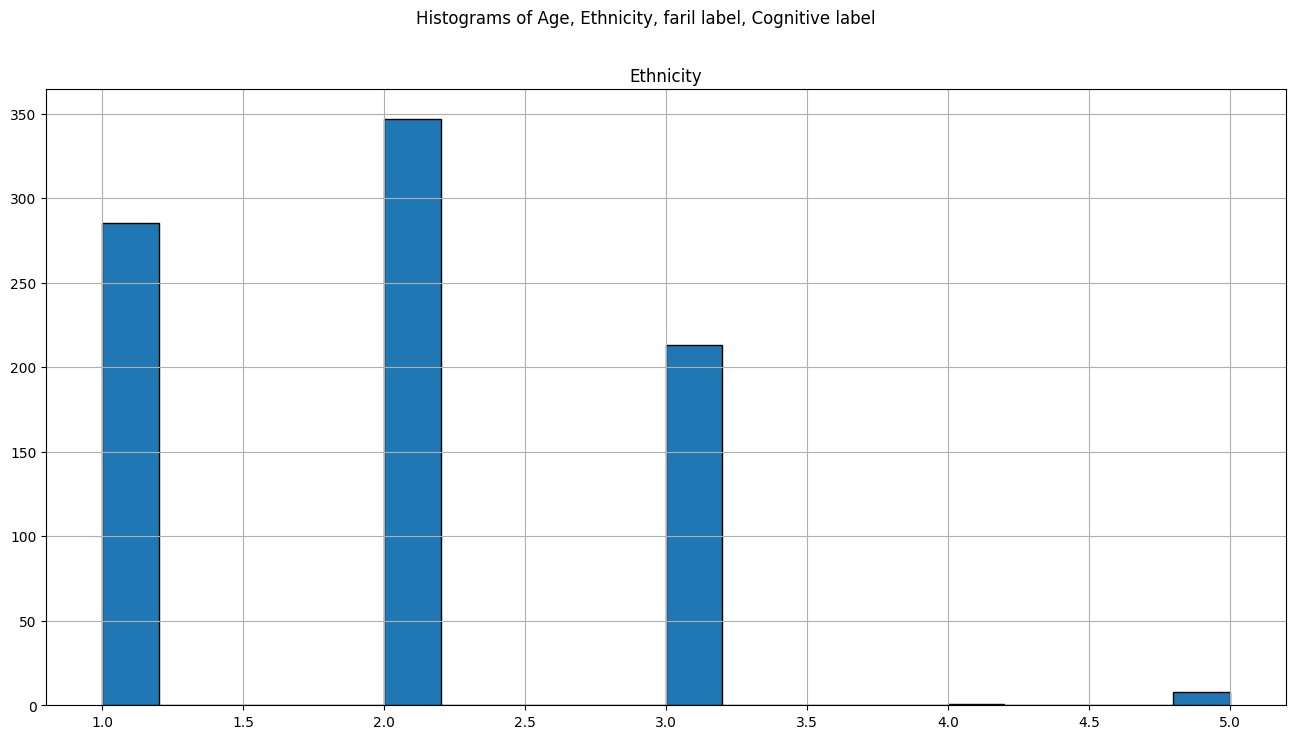

In [29]:
#HISTOGRAM PLOT FOR  COGNITIVE FRAILTY

df[['Age', 'Ethnicity', 'frail label', 'Cognitive label']].hist(bins=20, figsize=(16, 8), edgecolor='black')
plt.suptitle('Histograms of Age, Ethnicity, faril label, Cognitive label')
plt.show()

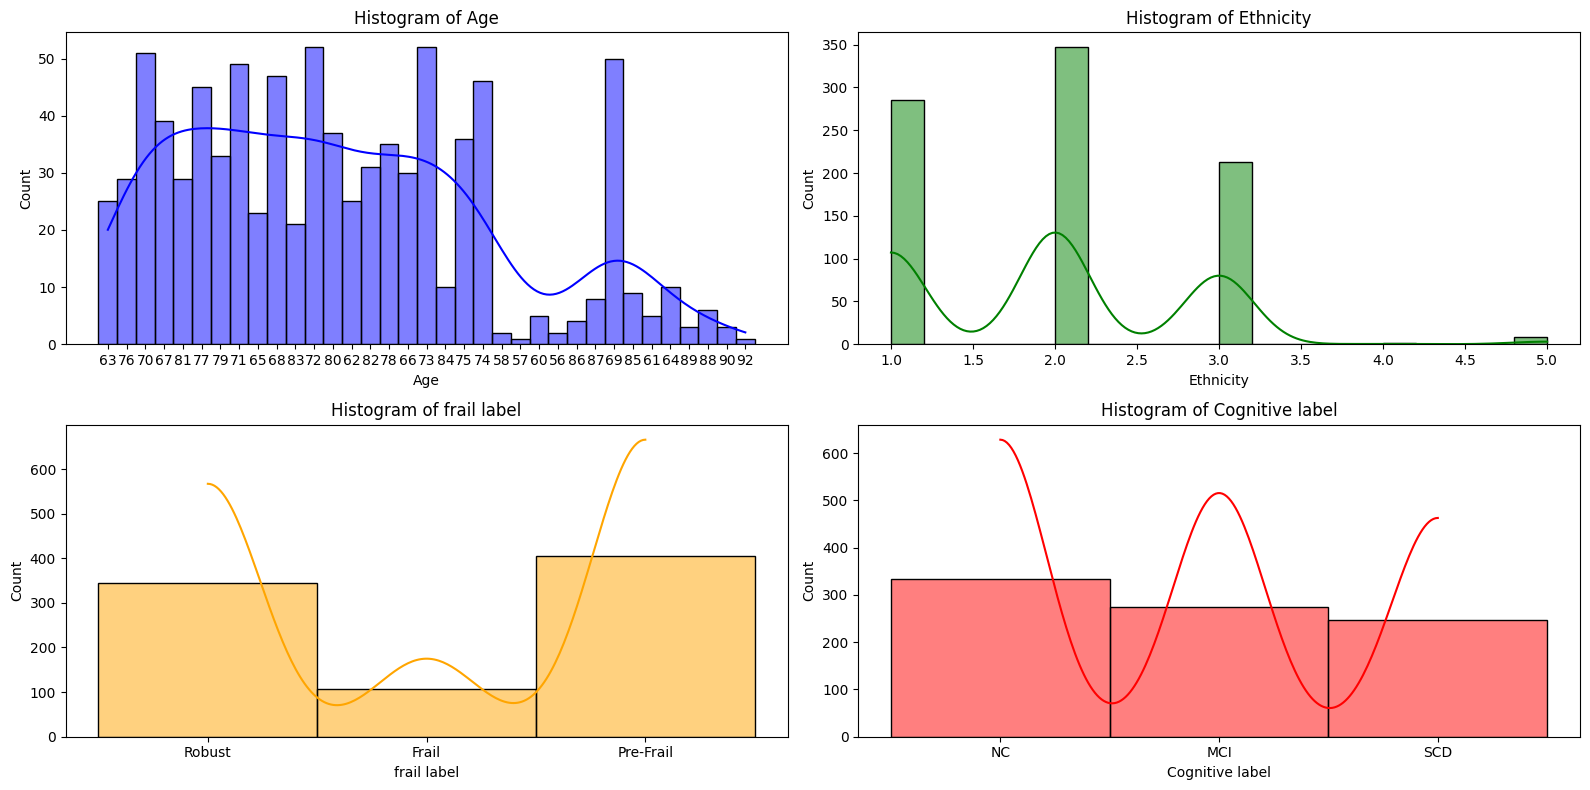

In [30]:
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Ethnicity'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Histogram of Ethnicity')

plt.subplot(2, 2, 3)
sns.histplot(df['frail label'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Histogram of frail label')

plt.subplot(2, 2, 4)
sns.histplot(df['Cognitive label'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('Histogram of Cognitive label')

plt.tight_layout()
plt.show()

In [31]:
!pip install missingno
##!pip install tensorflow

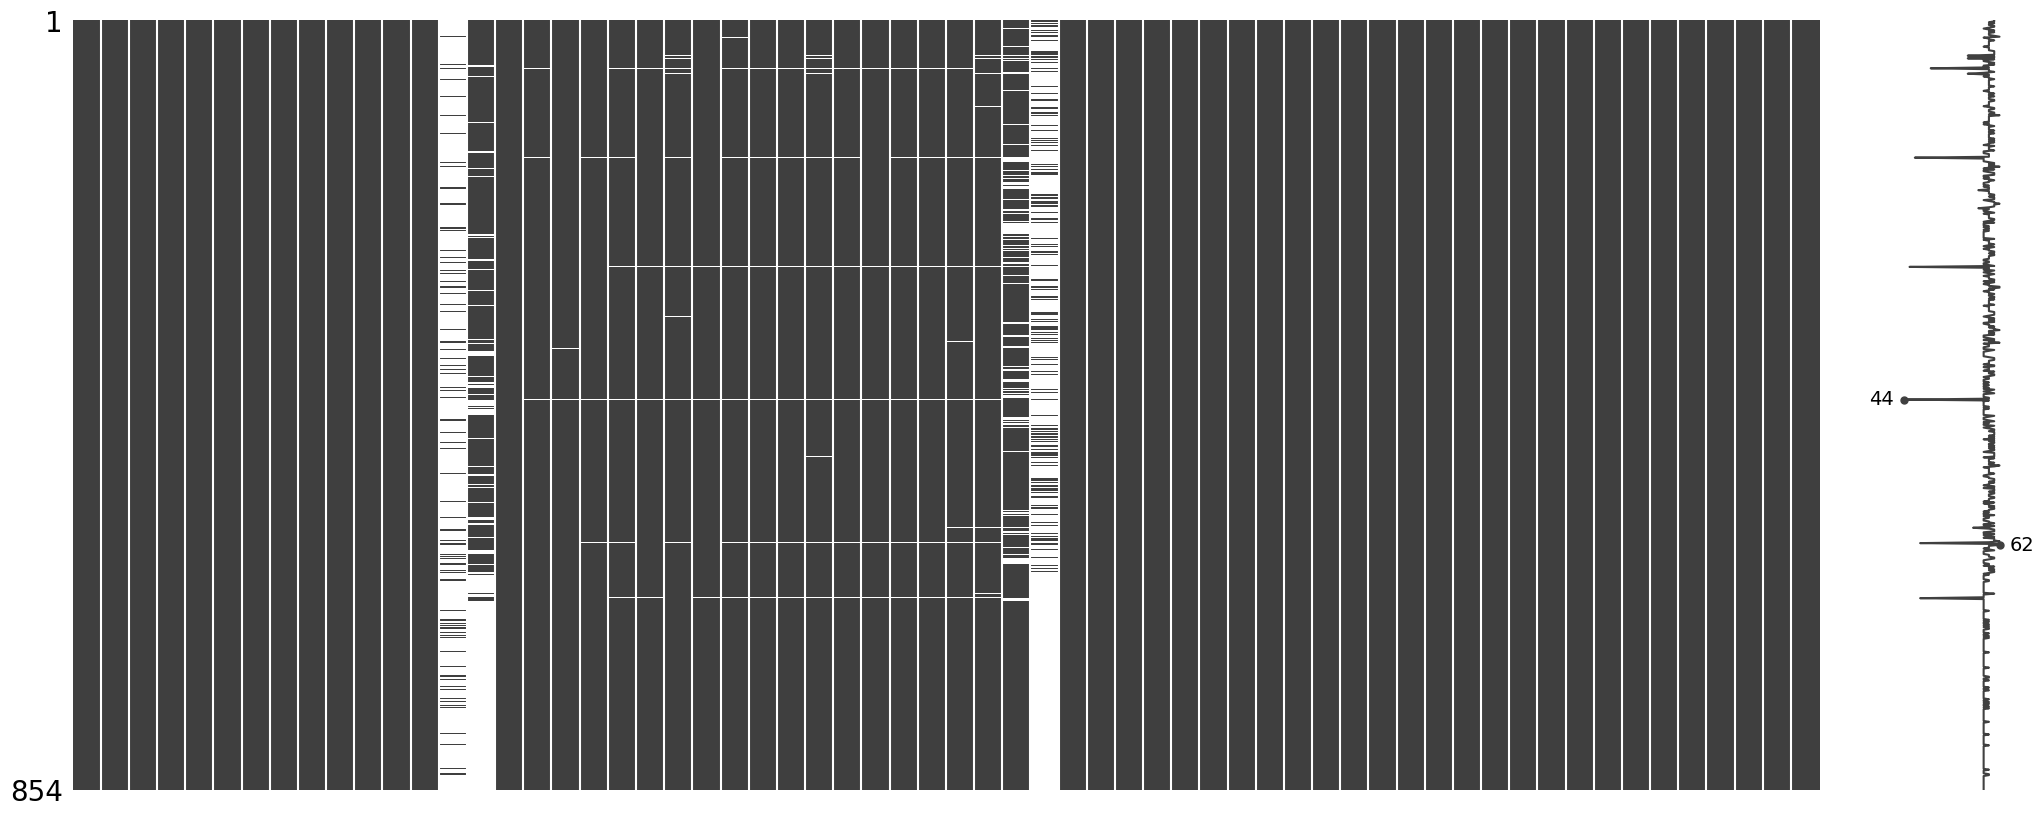

In [32]:
# VUISUALISING THE MISSING VALUE PATTERNS
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

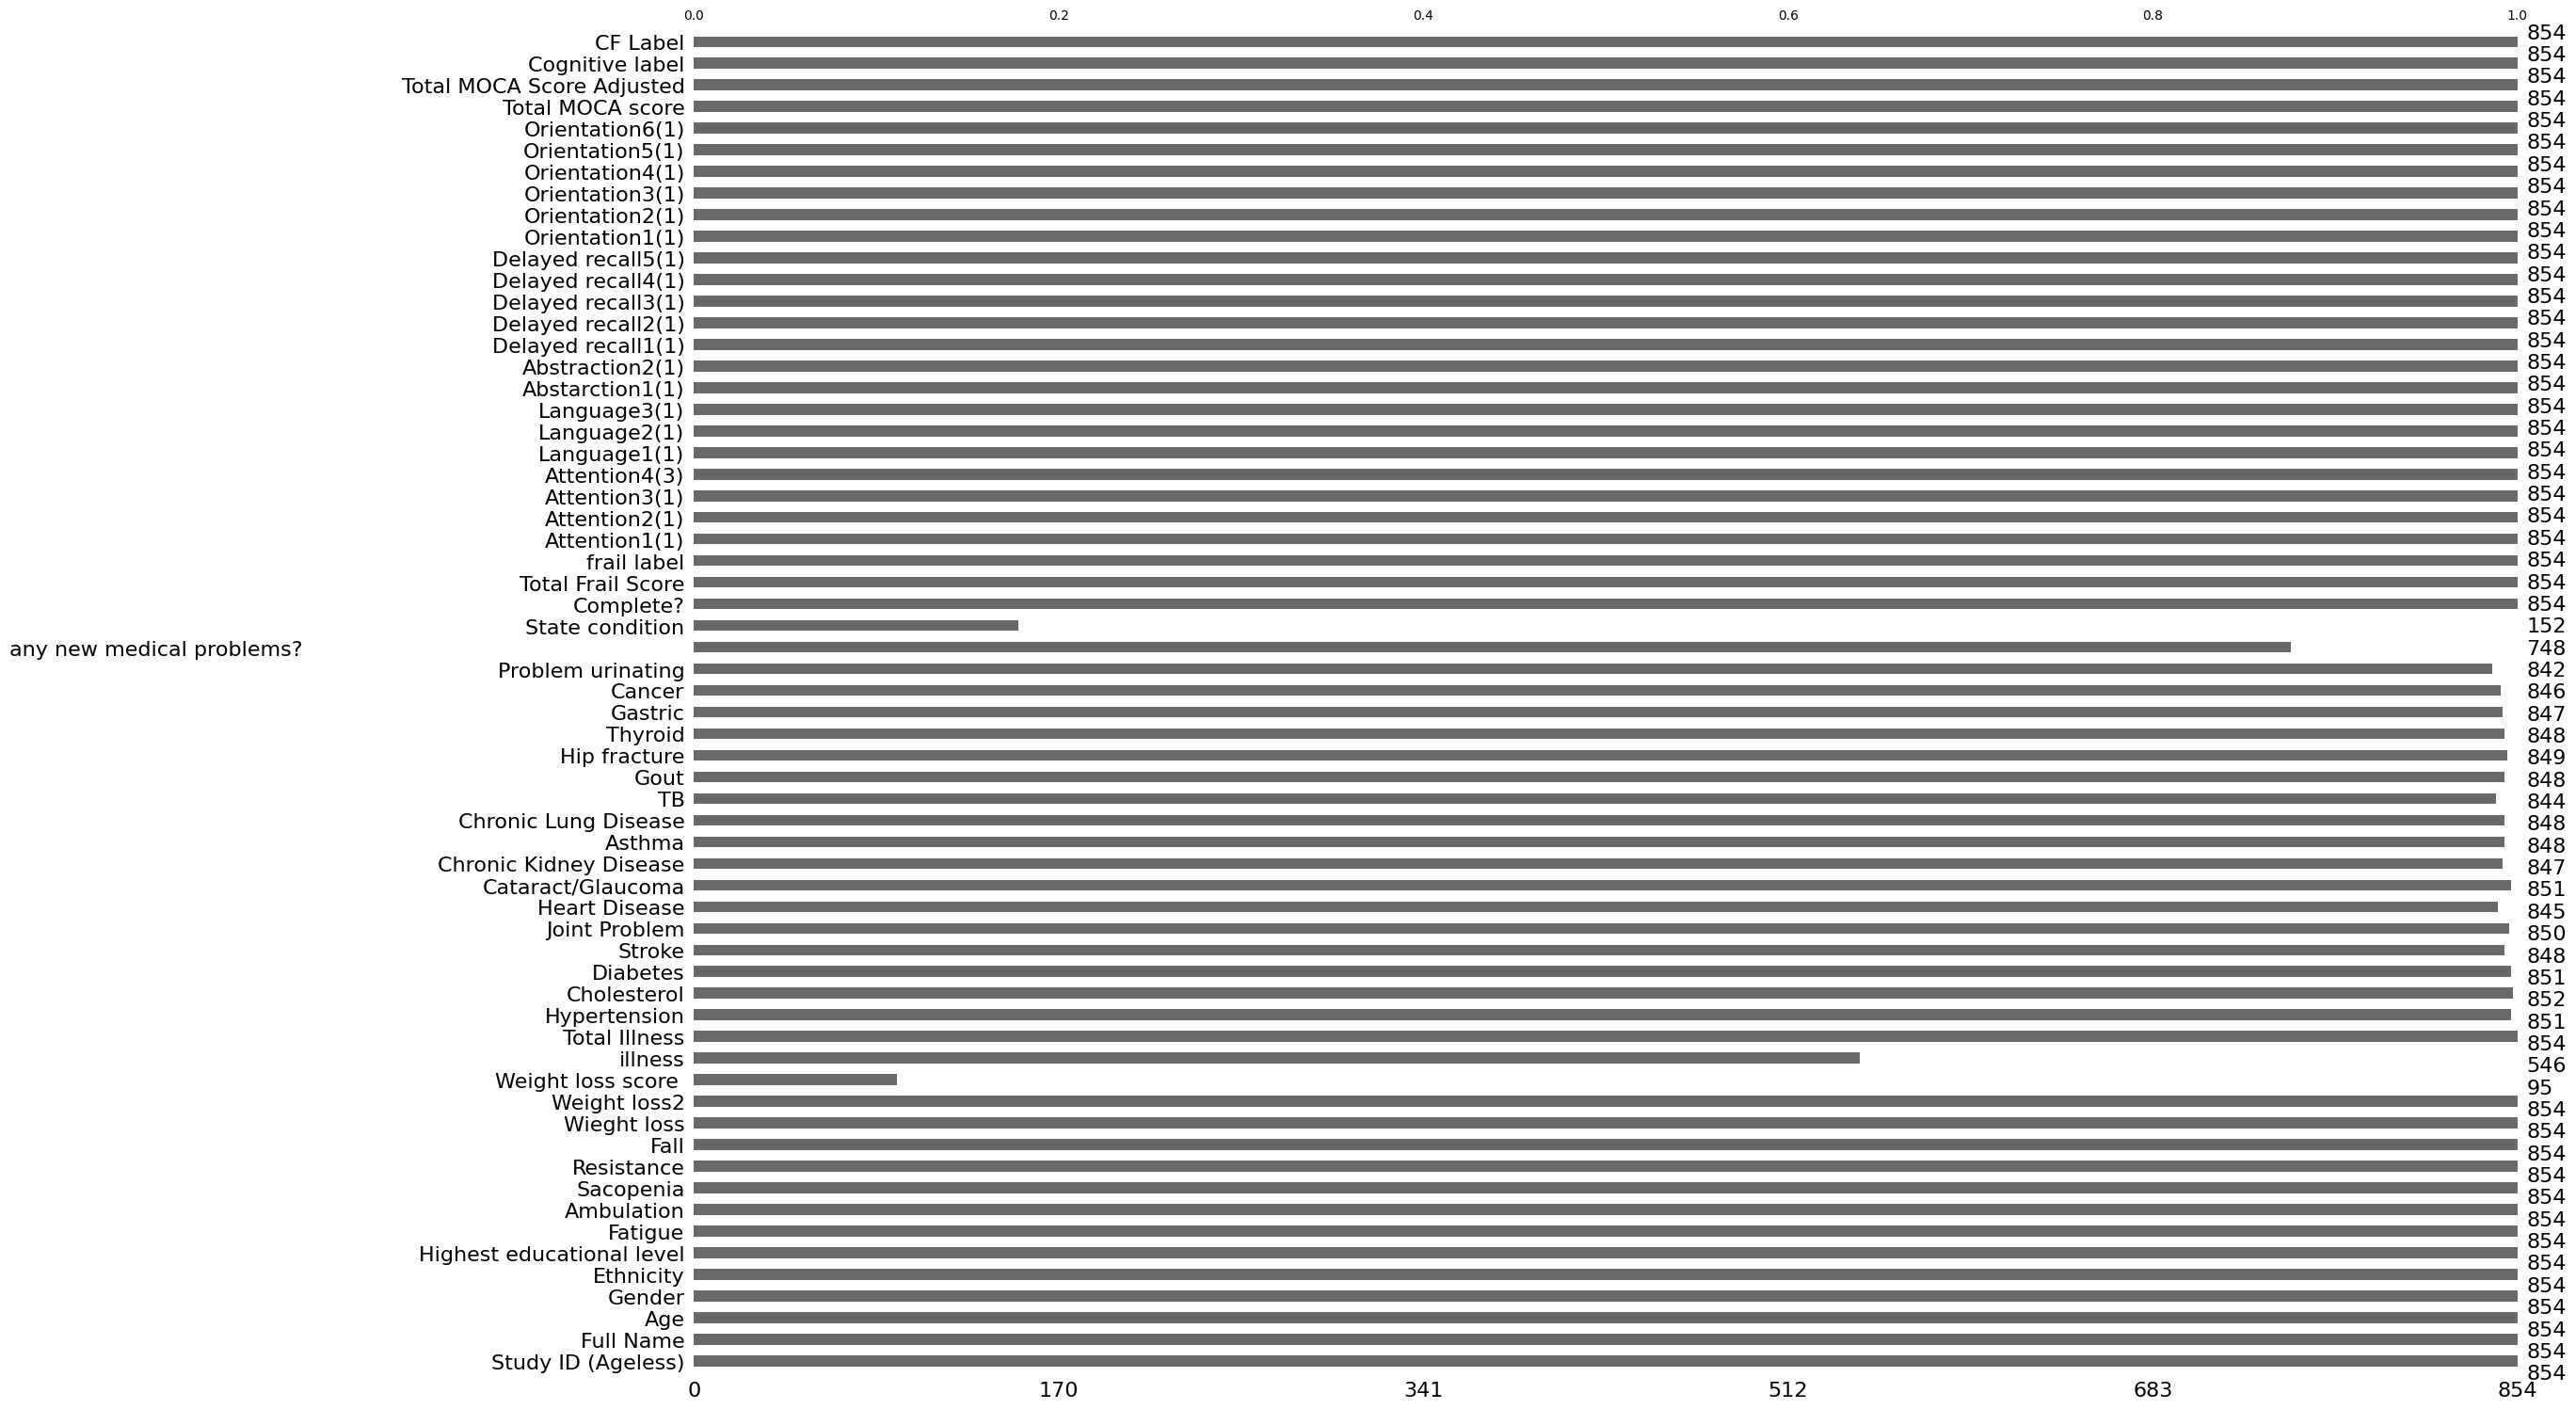

In [33]:
msno.bar(df)
plt.show()

In [34]:
# Calculate the mode of illness column and fill null values
df['illness'] = df['illness'].fillna(df['illness'].mode().iloc[0])

print(df)

      Study ID (Ageless)                       Full Name Age  Gender  \
3                      4  CHANDRIKA A/P GANGADHARAN MENN  63       0   
6                      7  SIVAPAKIA NATHAN A/L KANDASAMY  76       1   
7                      8      JEYAMALAR A/P S PARAMASAMY  70       0   
11                    12                CHE YUN BT OSMAN  76       1   
16                    17                    KOK KIM CHOO  67       0   
...                  ...                             ...  ..     ...   
4670                4787                Thui Choong Heng  62       1   
4674                4791                     Linda Scott  61       0   
4708                4825             Mat Derus bin Maaji  85       1   
4718                4835                 Mazlan Bin Amat  68       1   
4725                4842                  CHOO MUN KEONG  76       1   

      Ethnicity  Highest educational level Fatigue Ambulation Sacopenia  \
3             3                          5       0          

<ipython-input-34-82ac720fe8fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['illness'] = df['illness'].fillna(df['illness'].mode().iloc[0])


In [35]:
column_name= 'Cognitive label'
item_counts= df[column_name].value_counts()
print(item_counts)

NC     334
MCI    274
SCD    246
Name: Cognitive label, dtype: int64


In [36]:
column_name= 'frail label'
item_counts= df[column_name].value_counts()
print(item_counts)

Pre-Frail    404
Robust       344
Frail        106
Name: frail label, dtype: int64


In [37]:
column_name= 'CF Label'
item_counts= df[column_name].value_counts()
print(item_counts)

 Robust             163
Pre-Frail only      139
Pre-Frail + EMCI    134
Pre-Frail + LMCI    131
LMCI Only            95
EMCI Only            86
Frail+LMCI           48
Frail Only           32
Frail + EMCI         26
Name: CF Label, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
#Select physical frailty Columns to train the model
Physical_Frailty_Columns= ['Age', 'Gender', 'Ethnicity', 'Fatigue', 'Ambulation', 'Resistance', 'Weight loss',
                           'illness', 'Hypertension', 'Cholesterol', 'Diabetes', 'Stroke', 'Joint Problem', 'Heart Disease',
                          'Cataract/Glaucoma', 'Chronic Kidney Disease', 'Asthma', 'Chronic Lung Disease', 'TB', 'Gout',
                          'Hip fracture', 'Thyroid', 'Gastric', 'Cancer', 'Problem urinating', 'Total Frail Score']

In [40]:
#Select Cognitive Impairments to train the model
Cognitive_Impairment_Columns= ['Attention1(1)', 'Attention2(1)', 'Attention3(1)', 'Attention4(3)', 'Language1(1)',
                              'Language2(1)', 'Language3(1)', 'Abstarction1(1)', 'Abstraction2(1)', 'Delayed recall1(1)',
                               'Delayed recall2(1)', 'Delayed recall3(1)', 'Delayed recall4(1)', 'Delayed recall5(1)',
                               'Orientation1(1)', 'Orientation2(1)', 'Orientation3(1)', 'Orientation4(1)',
                               'Orientation5(1)', 'Orientation6(1)', 'Total MOCA Score Adjusted']

In [41]:
Physical_frailty_df=df[Physical_Frailty_Columns]
Cognitive_impairment_df=df[Cognitive_Impairment_Columns]

KeyError: ignored

In [ ]:
print(Physical_frailty_df.head(10))

In [ ]:
print(Cognitive_impairment_df.head(10))

In [ ]:
Physical_frailty_df.reset_index(drop=True, inplace=True)
Cognitive_impairment_df.reset_index(drop=True, inplace=True)
X = pd.concat([Physical_frailty_df, Cognitive_impairment_df], axis=1)
y=df['CF Label']

In [ ]:
# Convert the target variable to categorical
y_categorical = pd.get_dummies(y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing: Standardize numerical features
numeric_features = ['Physical_frailty_df', 'Cognitive_impairments_df']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [ ]:
# Define the model architecture for multi-class classification
model = keras.Sequential([
    #layers.Input(shape=(47,)),
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y_categorical.columns), activation='softmax')  # Multi-class classification (softmax activation)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#print(X_train.columns)

In [ ]:
# Train the model
#model.fit(preprocessor.fit_transform(X_train), y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
print(X.shape)